MNIST Dataset Convolution

In [153]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [154]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, BatchNormalization
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
import datetime

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_validation, y_validation) = mnist.load_data()

x_train = x_train.reshape(60000, 28, 28, 1)
x_validation = x_validation.reshape(10000, 28, 28, 1)
x_train, x_validation = x_train/255, x_validation/255

kernel_size = (3,3)
pool_size = (2,2)

x_train = x_train.astype('float32')
x_validation = x_validation.astype('float32')

print(x_train.shape, 'train samples')
print(x_validation.shape, 'validation samples')

print(y_train.shape, 'y_train')
print(y_validation.shape, 'y_validation')

(60000, 28, 28, 1) train samples
(10000, 28, 28, 1) validation samples
(60000,) y_train
(10000,) y_validation


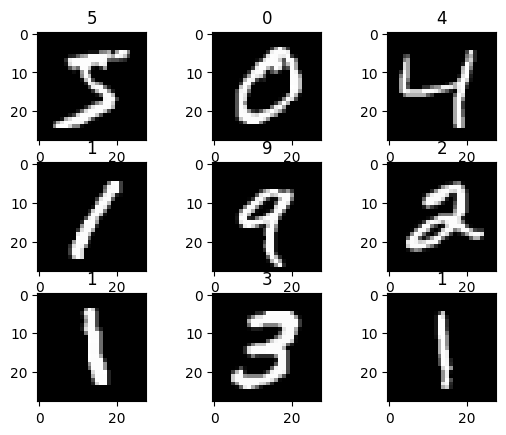

In [155]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(y_train[i])
plt.show()


In [156]:
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten, GlobalAveragePooling2D
from keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential

model = Sequential()

model.add(Conv2D(32, kernel_size, activation = 'relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size))
model.add(Dropout(0.5))

model.add(Conv2D(64, kernel_size, activation = 'relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size))
model.add(Dropout(0.5))

# MLP
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_69 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_96          │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_66 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_94 (Dropout)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_70 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_97          │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_67 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_95 (Dropout)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_31 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_98          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_96 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,930 (882.54 KB)

 Trainable params: 225,482 (880.79 KB)

 Non-trainable params: 448 (1.75 KB)

In [157]:
checkpointer = ModelCheckpoint(filepath='model.keras', monitor='val_loss', verbose=1, save_best_only=True)

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

y_train = to_categorical(y_train, num_classes=10)
y_validation = to_categorical(y_validation, num_classes=10)

history = model.fit(x_train, y_train, validation_data = (x_validation, y_validation), epochs=5, batch_size=16, callbacks=[checkpointer, tensorboard])

Epoch 1/5
3748/3750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8655 - loss: 0.4233
Epoch 1: val_loss improved from inf to 0.05063, saving model to model.keras
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 35s 9ms/step - accuracy: 0.8655 - loss: 0.4232 - val_accuracy: 0.9836 - val_loss: 0.0506
Epoch 2/5
3747/3750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9637 - loss: 0.1157
Epoch 2: val_loss improved from 0.05063 to 0.03580, saving model to model.keras
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 31s 8ms/step - accuracy: 0.9637 - loss: 0.1157 - val_accuracy: 0.9884 - val_loss: 0.0358
Epoch 3/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9718 - loss: 0.0893
Epoch 3: val_loss improved from 0.03580 to 0.03368, saving model to model.keras
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 31s 8ms/step - accuracy: 0.9718 - loss: 0.0893 - val_accuracy: 0.9891 - val_loss: 0.0337
Epoch 4/5
3747/3750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9743 - loss: 0.0823
Epoch 4: val_loss improved from 0.03368 to 0.02816, savi

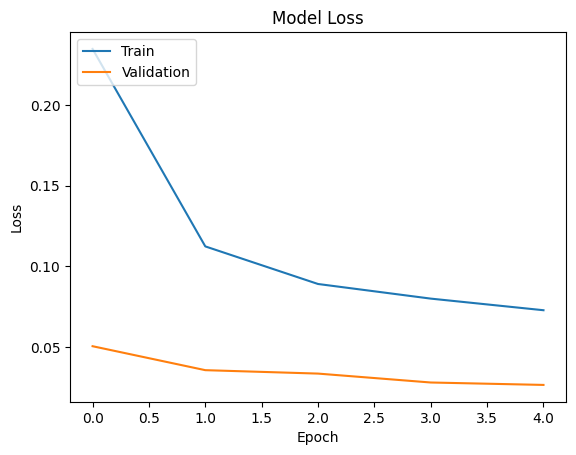

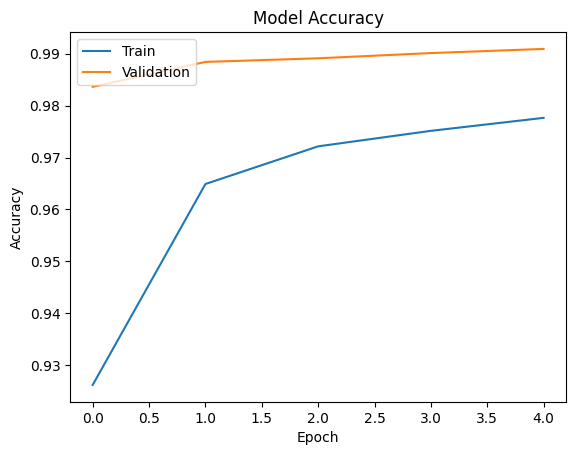

In [158]:
# plot the loss and accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## CIFAR10

In [159]:
from keras.datasets import cifar10

cifar10 = tf.keras.datasets.cifar10


(x_train, y_train), (x_validation, y_validation) = cifar10.load_data()

# reshape
x_train = x_train.reshape(50000, 32, 32, 3)
x_validation = x_validation.reshape(10000, 32, 32, 3)
x_train, x_validation = x_train/255, x_validation/255

kernel_size = (3,3)
pool_size = (2,2)

x_train = x_train.astype('float32')
x_validation = x_validation.astype('float32')

print(x_train.shape, 'train samples')
print(x_validation.shape, 'validation samples')

print(y_train.shape, 'y_train')
print(y_validation.shape, 'y_validation')

(50000, 32, 32, 3) train samples
(10000, 32, 32, 3) validation samples
(50000, 1) y_train
(10000, 1) y_validation


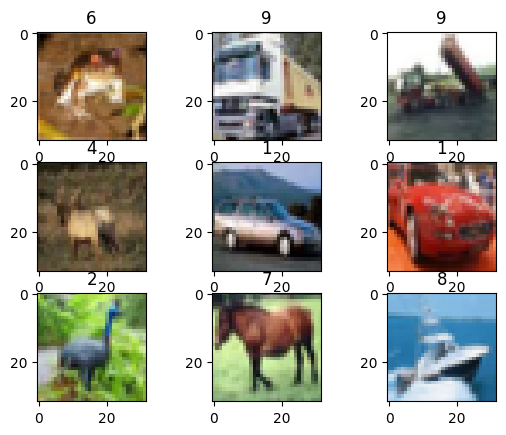

In [160]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i].reshape(32,32,3), interpolation='none')
    plt.title(y_train[i][0])
plt.show()

In [161]:
model = Sequential()

model.add(Conv2D(32, kernel_size, activation = 'relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size))
model.add(Dropout(0.5))

model.add(Conv2D(64, kernel_size, activation = 'relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size))
model.add(Dropout(0.5))

# MLP
model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_71 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_99          │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_68 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_97 (Dropout)            │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_72 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_100         │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_69 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_98 (Dropout)            │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_32 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,946 (656.04 KB)

 Trainable params: 167,754 (655.29 KB)

 Non-trainable params: 192 (768.00 B)

In [162]:
from tensorflow.keras.optimizers import Adam

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

y_train = to_categorical(y_train, num_classes=10)
y_validation = to_categorical(y_validation, num_classes=10)

history = model.fit(x_train, y_train, validation_data = (x_validation, y_validation), epochs=10, batch_size=32, callbacks=[checkpointer, tensorboard])

Epoch 1/10
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3266 - loss: 1.9038
Epoch 1: val_loss did not improve from 0.02667
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.3267 - loss: 1.9035 - val_accuracy: 0.4747 - val_loss: 1.4747
Epoch 2/10
1561/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5097 - loss: 1.3658
Epoch 2: val_loss did not improve from 0.02667
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.5097 - loss: 1.3658 - val_accuracy: 0.4495 - val_loss: 1.7562
Epoch 3/10
1561/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5599 - loss: 1.2351
Epoch 3: val_loss did not improve from 0.02667
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.5599 - loss: 1.2350 - val_accuracy: 0.6037 - val_loss: 1.1243
Epoch 4/10
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5907 - loss: 1.1510
Epoch 4: val_loss did not improve from 0.02667
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.5907 - loss: 1.1510 - val_accuracy

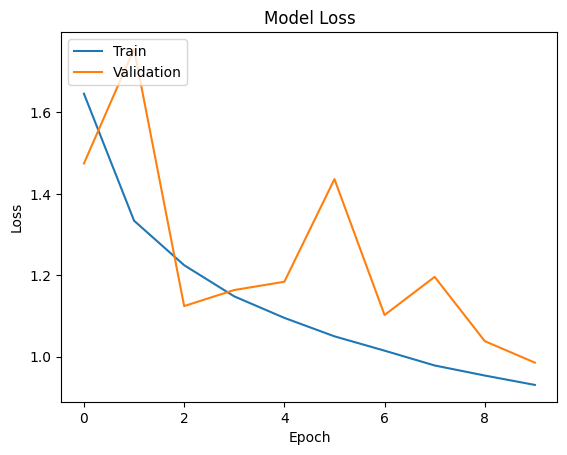

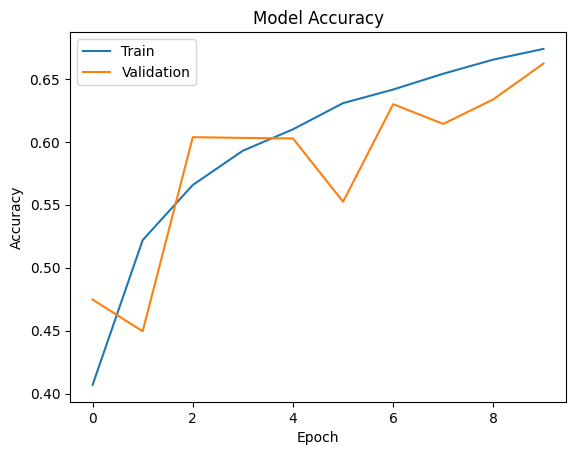

In [163]:
# plot the loss and accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### CIFAR100

In [164]:
from keras.datasets import cifar100

cifar10 = tf.keras.datasets.cifar100


(x_train, y_train), (x_validation, y_validation) = cifar100.load_data()

# reshape
x_train = x_train.reshape(50000, 32, 32, 3)
x_validation = x_validation.reshape(10000, 32, 32, 3)
x_train, x_validation = x_train/255, x_validation/255

kernel_size = (3,3)
pool_size = (2,2)

x_train = x_train.astype('float32')
x_validation = x_validation.astype('float32')

print(x_train.shape, 'train samples')
print(x_validation.shape, 'validation samples')

print(y_train.shape, 'y_train')
print(y_validation.shape, 'y_validation')

(50000, 32, 32, 3) train samples
(10000, 32, 32, 3) validation samples
(50000, 1) y_train
(10000, 1) y_validation


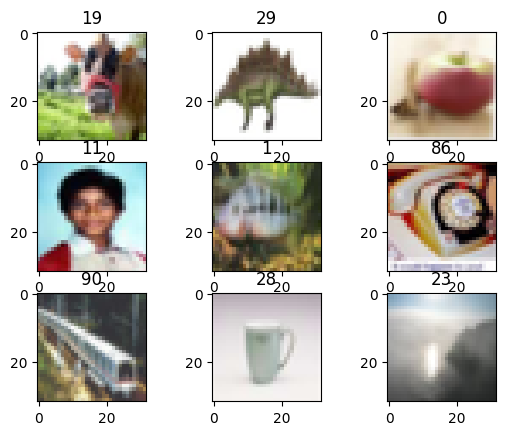

In [165]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i].reshape(32,32,3), interpolation='none')
    plt.title(y_train[i][0])
plt.show()

In [166]:
from tensorflow.keras.optimizers import RMSprop

model = Sequential()

model.add(Conv2D(32, kernel_size, activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size))

model.add(Conv2D(64, kernel_size, activation='relu'))
model.add(MaxPool2D(pool_size))

model.add(Conv2D(128, kernel_size, activation='relu'))
model.add(MaxPool2D(pool_size))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(100, activation='softmax'))

model.summary()

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_73 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_70 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_74 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_71 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_75 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_72 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_33 (Flatten)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_99 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171,812 (671.14 KB)

 Trainable params: 171,812 (671.14 KB)

 Non-trainable params: 0 (0.00 B)

In [167]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

optimizer = RMSprop(learning_rate=0.001) # Essai d'un autre optimizer par manque de temps avec Adam, compilation trop longue
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

y_train = to_categorical(y_train, num_classes=100)
y_validation = to_categorical(y_validation, num_classes=100)

history = model.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=20, batch_size=256, callbacks=[checkpointer, tensorboard])


Epoch 1/20
195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.0264 - loss: 4.4726
Epoch 1: val_loss did not improve from 0.02667
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 60ms/step - accuracy: 0.0266 - loss: 4.4712 - val_accuracy: 0.0796 - val_loss: 4.0816
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.0884 - loss: 3.9994
Epoch 2: val_loss did not improve from 0.02667
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - accuracy: 0.0884 - loss: 3.9991 - val_accuracy: 0.1278 - val_loss: 3.7517
Epoch 3/20
195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.1297 - loss: 3.7302
Epoch 3: val_loss did not improve from 0.02667
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - accuracy: 0.1298 - loss: 3.7296 - val_accuracy: 0.1768 - val_loss: 3.5203
Epoch 4/20
195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.1674 - loss: 3.5194
Epoch 4: val_loss did not improve from 0.02667
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - accuracy: 0.1674 - loss: 3.5190 - val_accuracy: 0.1862 - val_l

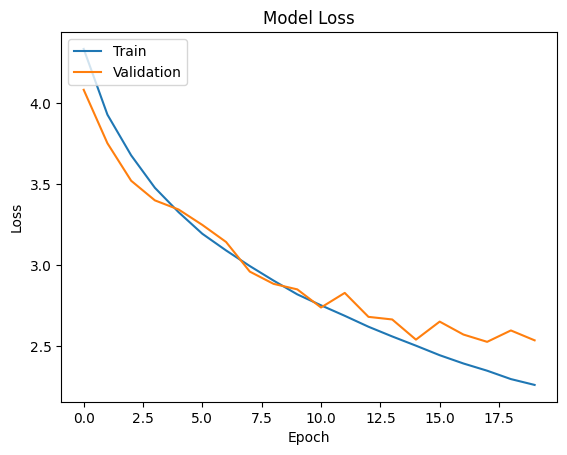

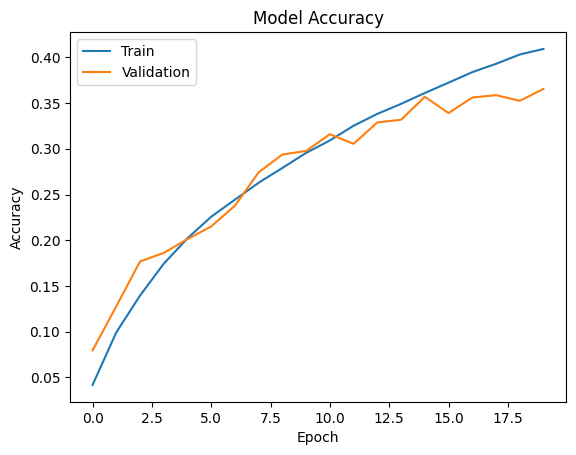

In [168]:
# plot the loss and accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [170]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 11232), started 0:00:08 ago. (Use '!kill 11232' to kill it.)